## Street network analysis when a street is a node

In some traditions of street network research, street becomes a node. The edges are connected when these streets touch each other. In OSMnx, basically, the intersections of streets become nodes and streets become edges. Therefore, in order to build a network according to the previous tradition, you have to modify the network that OSMnx generates properly. Fortunately, NetworkX has line_graph() function that does exactly that operation. This example demonstrates the process of transforming a city's street network into a line graph using OSMnx and calculating and coloring the closeness centrality for this line graph.

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx/tree/master/examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)

In [1]:
import osmnx as ox, networkx as nx, matplotlib.cm as cm, matplotlib.colors as colors
%matplotlib inline
ox.config(log_console=True, use_cache=True)

### Create a street network using OSMnx

In [2]:
# get the network and project it
G = ox.graph_from_place('Piedmont, California, USA', network_type='drive')
G_projected = ox.project_graph(G)

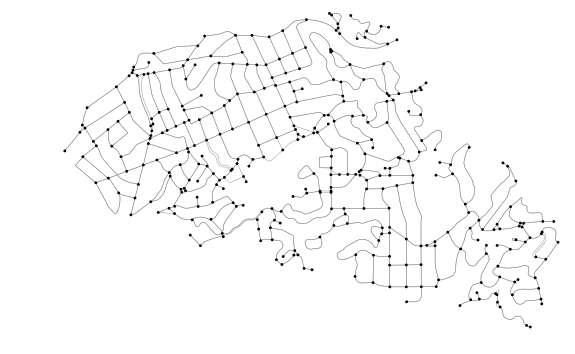

In [3]:
# plot it: nodes in this network are street junctions
fig, ax = ox.plot_graph(G_projected, node_size=8, node_color='k', node_zorder=2, 
                        edge_color='gray', edge_linewidth=0.5, edge_alpha=0.8)

### Let's convert the graph into a line graph so that the streets become nodes in the new graph.

In [4]:
# NetworkX's line_graph() creates a line graph
L=nx.line_graph(G_projected)

# calculate closeness of each street from the line graph
closeness = nx.closeness_centrality(L)

### We are going to color streets in the original graph with their closeness centralities.

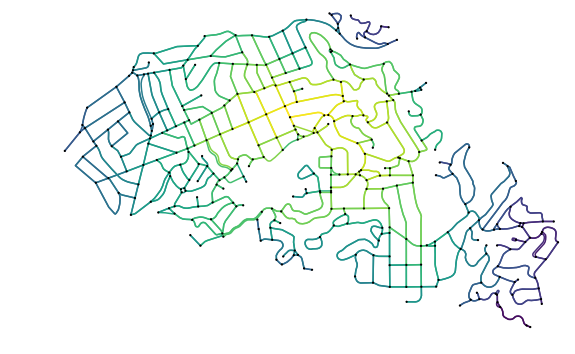

In [5]:
# list of edge values for the orginal graph
ev = [closeness[edge + (0,)] for edge in G_projected.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev), vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.viridis)
ec= [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G_projected, node_size=5, node_color='k', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)